In [1]:
import pandas as pd
from fuzzywuzzy import fuzz

df = pd.read_csv('./scraper/archive/300postfullnew.csv', names=["Author", "comment", "Date", "Link", "title", 'type'])

query = 'How to make a list in python'

def calPartialRatio (str1, str2):
    return fuzz.partial_ratio(str1, str2)
  
def calTokenSortRatio (str1, str2):
    return fuzz.token_sort_ratio(str1, str2)
  
# get all unique values in column 3
unique_values = df['title'].unique()
print(len(unique_values))

# create another dataframe to store the results
df2 = pd.DataFrame(columns=['title', 'partial_ratio', 'token_sort_ratio'])

# calculate the partial ratio for each unique value
for unique_value in unique_values:
    df2 = pd.concat([df2, pd.DataFrame({'title': unique_value, 'partial_ratio': calPartialRatio(unique_value, query), 'token_sort_ratio': calTokenSortRatio(unique_value, query)}, index=[0])], )

df2.sort_values(by=['partial_ratio'], ascending=False).head(10)


/Users/shaun/miniforge3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


354


,title,partial_ratio,token_sort_ratio
0,How do I make a flat list out of a list of lists?,68,55
0,How do we split a python list at the largest g...,68,43
0,max date in python list,68,75
0,Trying to increase item in a python list to ge...,64,48
0,Memory leakage issue in python list,64,54
0,How to format python list in a good format result,64,60
0,Print values that fall between two values in p...,64,48
0,How to access all list elements from last to f...,64,47
0,"howto to join ""only"" values of a an element of...",64,41
0,how to reverse slice python list,61,60


In [3]:
df2.sort_values(by=['token_sort_ratio'], ascending=False).head(10)

,title,partial_ratio,token_sort_ratio
0,how to search in a python list?,61,79
0,max date in python list,68,75
0,How do I prepend to a short python list?,55,72
0,Parse xml file to a python list,50,71
0,How to add a new element in python LIST/DICT?,61,69
0,Append list to a python list,57,68
0,Convert NumPy array to Python list,39,68
0,How to iterate all item at once in python list?,57,68
0,How to convert python list to JSON array?,57,65
0,How to indent Python list-comprehensions?,54,65


In [4]:
class GroupedComments: 
    def __init__(self, comments, title): 
        self.comments = comments 
        self.title = title

def groupingAllCommentsOnTop20(df, oridf,  by, number): 
    df.sort_values(by=[by], ascending=False).head(number)
    all_grouped_comments = [] 
    for index, row in df.iterrows():
        # print column 1 
        title = row[0]
        # find all comments with the same title in oridf
        comments = oridf[oridf['title'] == title]['comment'].tolist()
        all_grouped_comments.append(
          GroupedComments(
            comments, title
          )
        )
        
    return all_grouped_comments
      
allcommentsGrouped = groupingAllCommentsOnTop20(df2, df, 'partial_ratio', 20)

print(allcommentsGrouped[2].title)
print(allcommentsGrouped[2].comments)

Remove similar Strings in Python List by Levenshtein Ratio
['Instead use list_comprehension and convert to set to remove duplicates ?', '@schieslu. Typo error: for x in word list: Should be for x in word_list:. Missed underscore', 'Typo error: for x in word list: Should be for x in word_list:. Missed underscore']


In [6]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
punctuation = punctuation + '\n'

compiledCommentsForFirstPost = ' '.join(allcommentsGrouped[0].comments)

stopwords = set(stopwords.words("english"))

In [8]:
word_frequencies = {}
for word in word_tokenize(compiledCommentsForFirstPost):
    if word not in stopwords:
        if word not in punctuation:
          if word not in word_frequencies.keys():
              word_frequencies[word] = 1
          else:
              word_frequencies[word] += 1

maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
    
print(sorted(word_frequencies))

sentence_list = sent_tokenize(compiledCommentsForFirstPost)
print('total sentences: ', len(sentence_list))

sentence_scores = {}
for sent in sentence_list:
    sentence = sent.split(" ")
    for word in sentence:        
        if word.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.lower()]
                
print('scores for sentences: ', sentence_scores)

["''", "'__iter__", "'d", "'dtype=object", "'list", "'m", "'re", "'s", "'ss", "'sss", "'ssssss", "'str", "'ve", '+1', '--', '-mtimeit', "-s'from", '...', '.flat', '.replace', '.split', '0', '1', '1,2,3', '10', '2', '2,3', '3', '3-d', '4', '4,5,6', '5', '6', '6.1.2', '7', '8', '8,9', '9', '9.5', '99', 'An', 'And', 'Answers', 'Book', 'But', 'Cheers', 'Code', 'Creating', 'Deleet', 'Does', 'FYI', 'Fails', 'For', 'GC', 'I', 'IDEs', 'If', 'Is', 'It', 'Iterable', 'MartinThoma', 'May', 'Maybe', 'Monoid', 'Much', 'Neat', 'Not', 'O', 'OP', 'One', 'Practice', 'Python', 'RobCrowell', 'Rossetta', 'Same', 'Sara', 'Shlemiel', 'So', 'Sure', 'That', 'The', 'There', 'This', 'Though', 'TimDierks', 'To', 'Tried', 'TypeError', 'Unfortunately', 'VisibleDeprecationWarning', 'Why', 'Will', 'You', 'Your', '``', 'abstractions', 'add', 'adding', 'afford', 'algorithm', 'already', 'also', 'alternatives', 'although', 'always', 'among', 'answer', 'anyone', 'append', 'appends', 'apply', 'appreciate', 'appreciated', '

In [18]:
from heapq import nlargest
from pydoc_data.topics import topics
select_length = int(len(sentence_list)*0.3)
print(select_length)
summary_sentences = nlargest(select_length, sentence_scores, key=sentence_scores.get)

final_summary = [word for word in summary_sentences]
summary = ' '.join(final_summary)

print(summary)
print(len(final_summary))
print(len(sentence_list))

# 1. --- Compile unique topics
# 2. 20 topics
# 3. find all of the comments in these 20 topics
# 4. sentence scoring comments
# 5. summary of the sentence_scores

75
If you meant to do this, you must specify 'dtype=object' when creating the ndarray One option missed above which shows up faster for my particular case i just items = []; for sublist in a: items.extend(sublist); return sublist This is a Shlemiel the painter's algorithm joelonsoftware.com/articles/fog0000000319.html reduce is very inefficient for this use case as it will repeat copies and generate many unused temporary lists (O(n^2) in both time and possibly space, depending on how the GC decides to clean). also, mind that list of strings will be flattened to a list of characters extend is better used as newlist = [], extend = newlist.extend, for sublist in l: extend(l) as it avoids the (rather large) overhead of the lambda, the attribute lookup on x, and the or. the above code doesnt seem to work for if one of the nested lists is having a list of strings. I reinvented his proposal yesterday, so this approach seems quite popular these days ;) Not quite: wierd_list = [[1, 2, 3], [4, 5

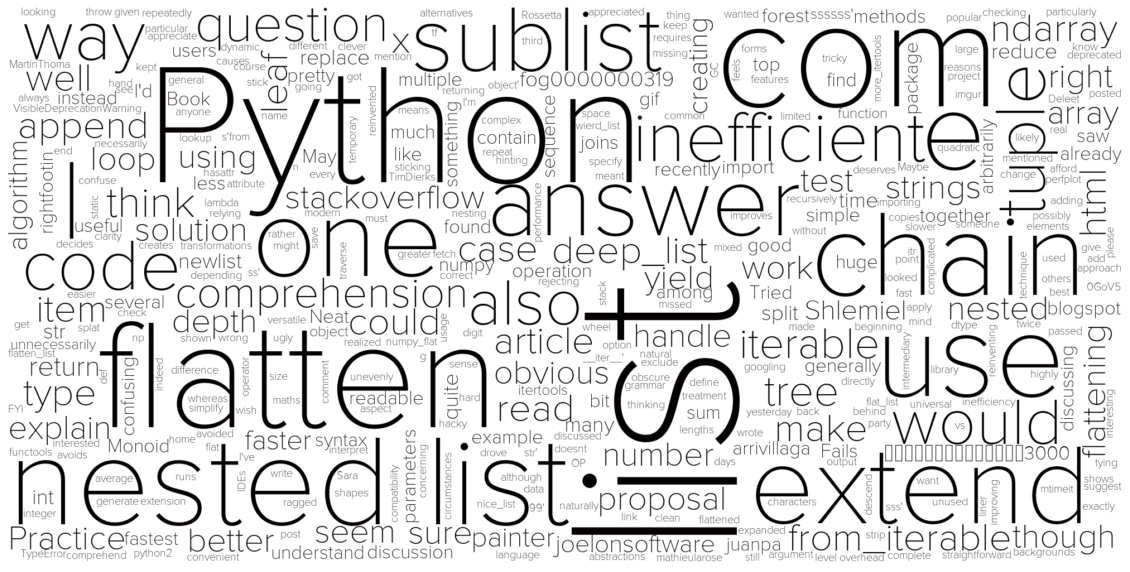

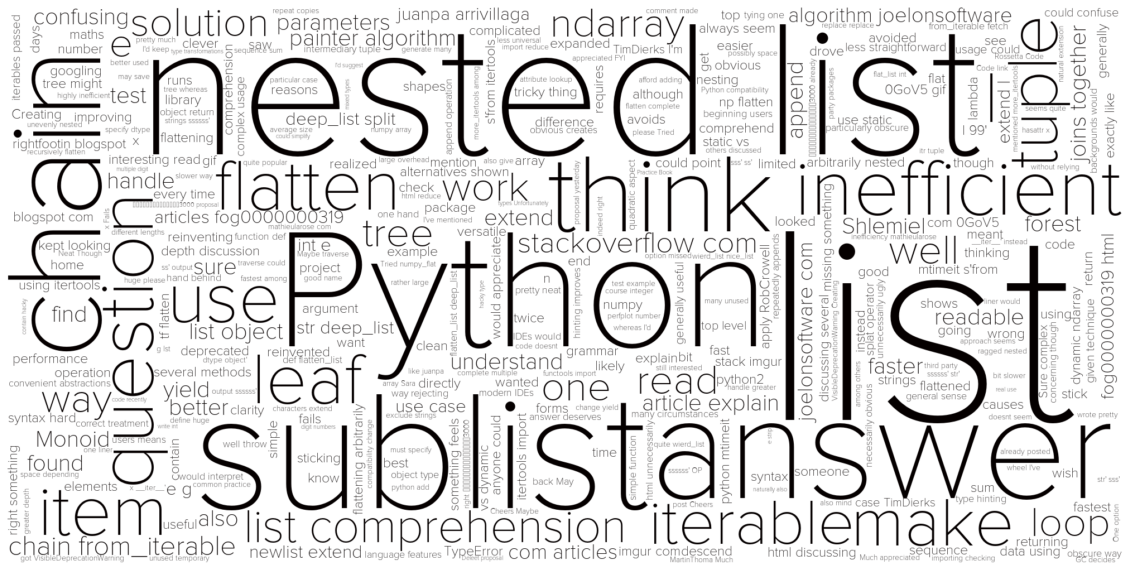

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

allComments = ' '.join(df['comment'].tolist())

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500, stopwords=stopwords).generate(" ".join(final_summary))
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500, stopwords=stopwords).generate(" ".join(sentence_list))
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# compare algorithm with other dataset
# grouping all comments database
# other word embeddings sum.
# word2vec, PCA
# put time as weightage
# faq dataset
# group comments based on 3months
# literature review on summarization

### Comparing Summarization Results

In [15]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
import pandas as pd
punctuation = punctuation + '\n'
stopwords = set(stopwords.words("english"))

df = pd.read_json('./scraper/archive/datasets/consumer-health/page2answer_multi_abstractive_summ.json')

focus = df[1]

all_answers = []
for key in focus['articles']:
    answers_arr = focus['articles'][key]
    all_answers.append(
      ''.join(answers_arr)
    )
all_answers = ' '.join(all_answers)

print(all_answers)

word_frequencies = {}

for word in word_tokenize(all_answers):
    if word not in stopwords:
        if word not in punctuation:
          if word not in word_frequencies.keys():
              word_frequencies[word] = 1
          else:
              word_frequencies[word] += 1

maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

# print(word_frequencies)
print(sorted(word_frequencies))



 Abetalipoproteinemia abetalipoproteinaemia abetalipoproteinemia neuropathy ABL acanthocytosis apolipoprotein B deficiency Bassen-Kornzweig disease Bassen-Kornzweig syndrome betalipoprotein deficiency disease congenital betalipoprotein deficiency syndrome microsomal triglyceride transfer protein deficiency disease MTP deficiency Description Abetalipoproteinemia is an inherited disorder that impairs the normal absorption of fats and certain vitamins from the diet. Many of the signs and symptoms of abetalipoproteinemia result from a severe shortage (deficiency) of fat-soluble vitamins (vitamins A, E, and K). The signs and symptoms of this condition primarily affect the gastrointestinal system, eyes, nervous system, and blood. The first signs and symptoms of abetalipoproteinemia appear in infancy. They often include failure to gain weight and grow at the expected rate (failure to thrive); diarrhea; and fatty, foul-smelling stools (steatorrhea). As an individual with this condition ages, a

In [13]:
sentence_list = sent_tokenize(all_answers)

sentence_scores = {}
for sent in sentence_list:
    sentence = sent.split(" ")
    for word in sentence:        
        if word.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.lower()]
                
print('scores for sentences: ', sentence_scores)

scores for sentences:  {' Abetalipoproteinemia abetalipoproteinaemia abetalipoproteinemia neuropathy ABL acanthocytosis apolipoprotein B deficiency Bassen-Kornzweig disease Bassen-Kornzweig syndrome betalipoprotein deficiency disease congenital betalipoprotein deficiency syndrome microsomal triglyceride transfer protein deficiency disease MTP deficiency Description Abetalipoproteinemia is an inherited disorder that impairs the normal absorption of fats and certain vitamins from the diet.': 8.75, 'Many of the signs and symptoms of abetalipoproteinemia result from a severe shortage (deficiency) of fat-soluble vitamins (vitamins A, E, and K).': 2.5625, 'The signs and symptoms of this condition primarily affect the gastrointestinal system, eyes, nervous system, and blood.': 2.0, 'The first signs and symptoms of abetalipoproteinemia appear in infancy.': 1.6875, 'They often include failure to gain weight and grow at the expected rate (failure to thrive); diarrhea; and fatty, foul-smelling st

In [14]:
from heapq import nlargest
from pydoc_data.topics import topics
select_length = int(len(sentence_list)*0.3)
print(select_length)
summary_sentences = nlargest(select_length, sentence_scores, key=sentence_scores.get)

final_summary = [word for word in summary_sentences]
summary = ' '.join(final_summary)

print(summary)
print(len(final_summary))
print(len(sentence_list))

38
Symptoms Symptoms include: Balance and coordination difficulties Curvature of spine Decreased vision that gets worse over time Developmental delay Failure to thrive (grow) in infancy Muscle weakness Poor muscle coordination that usually develops after age 10 Protruding abdomen Slurred speech Stool abnormalities, including fatty stools that appear pale in color, frothy stools, and abnormally foul-smelling stools Exams and Tests There may be damage to the retina of the eye (retinitis pigmentosa). Tests that may be done to help diagnose this condition include: Apolipoprotein B blood test Blood tests to look for vitamin deficiencies (fat-soluble vitamins A, D, E, and K) "Burr-cell" malformation of the red cells (acanthocytosis) Complete blood count (CBC) Cholesterol studies Electromyography Eye exam Nerve conduction velocity Stool sample analysis Genetic testing may be available for mutations in the <em>MTP</em> gene. 3-Incomplete  Abetalipoproteinemia Bassen Kornzweig syndrome Microsom